## Content


- **Introduction to Business case : Data Scientist at Medium.**


- **Exploratory Data Analysis**
  - Mean reading time vs article length
  - Authors vs article topics

- **Data Preprocessing**
  - Word Contractions

- **How do we represent text as numbers ?**
  - One-Hot Encoding

- **Optimization on One Hot Encoding**
    - Sparse vectors
    - Bag of Words
    - TF - IDF
        
    

- **Euclidean distance vs Cosine Similarity**  
       

- **How will we find similarity between documents**
  - BOW
  - TF-IDF
  
- **How do we visualize the features?**
  - T-SNE

- **Extra Material**
  - TF-IDF: Smoothened IDF
  - TF-IDF: Max IDF

    





# Finding similar Medium articles
`You are working as a Data Scientist at Medium`

* [Medium](https://medium.com/@Arun_Gautham_Soundarrajan/nlp-basics-text-representation-and-similarity-649c05c8d6a3) is an online publishing platform which hosts a hybrid collection of blog posts from both amateur and professional people and publications.
* In 2020, about 47,000 articles were published daily on the plaform and it had about 200M visitors every month.

**Problem Statement:**
- You want to give readers a better reading experience at Medium. To do that, you want to `recommend articles to the user on the basis of current article` that the user is reading.

- **More concretely, given a Medium article find a set of similar articles.**  



#### How would a human find similar articles in a corpus ?
1. Look at the title - find similar titles.
2. Find articles by the same author.
3. Go through the text, understand it and group the aricles within broader topics.

## Let's have a look at the data

#### What data are we going to use ?

1. Each article in Medium has a title, article text and author associated with it. To begin with, this data should be sufficient to understand the articles and to find similar articles.

2. The user might like articles which belong the same topic -

* **For example:** if a user is reading an article on Neural Networks, he/she might be interested in a similar article which talks about Convolutional Neural Netwroks (both of these aticles belong to a broader domain of Deep Learning).

#### How do we get this data ?

* Well, we can scrape it from Medium (scrapping is covered later in the track).
* We've done that already.
* We have a collection of medium articles with it's title, subtitle, author, reading time, text and the link of that article.

In [ ]:
# libraries to display dataframe and images
from IPython.display import display
from PIL import Image
# matplotlib for vizualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# inbuild library to work with textual data
import string
# Setting up the NLTK to pre-processing textual data
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('universal_tagset')
nltk.download('treebank')

sns.set_theme(style="darkgrid")
pd.set_option("display.max_columns", 100)
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


---
## 1.1 Understanding the Dataset
---

1.  Dataset source: [towardsdatascience.com](https://towardsdatascience.com/)
2.  Total 208 articles with title, article text, author name, reading_time etc.

Link for dataset -  [medium_articles_v3](https://drive.google.com/file/d/1MyOEKk_z78P8JL0mTYSerRiPLVflkVK6/view?usp=sharing)




In [ ]:
!gdown 1MyOEKk_z78P8JL0mTYSerRiPLVflkVK6

Downloading...
From: https://drive.google.com/uc?id=1MyOEKk_z78P8JL0mTYSerRiPLVflkVK6
To: /content/medium_articles_v3.csv
100% 3.13M/3.13M [00:00<00:00, 102MB/s]


## Using [spaCy](https://spacy.io/)

* spaCy is a free open-source library for Natural Language Processing in Python. `It features NER, POS tagging, dependency parsing, word vectors and more`.

In [ ]:
import numpy as np
import pandas as pd
import spacy
from spacy import displacy

# reading the csv data file
articles = pd.read_csv("/content/medium_articles_v3.csv")
display(articles.head(10))
print("Shape of dataframe : {}".format(articles.shape))

,link,title,sub_title,author,reading_time,text,id
0,https://towardsdatascience.com/ensemble-method...,"Ensemble methods: bagging, boosting and stacking",Understanding the key concepts of ensemble lea...,Joseph Rocca,20,This post was co-written with Baptiste Rocca.\...,1
1,https://towardsdatascience.com/understanding-a...,Understanding AUC - ROC Curve,"In Machine Learning, performance measurement i...",Sarang Narkhede,5,"In Machine Learning, performance measurement i...",2
2,https://towardsdatascience.com/how-to-work-wit...,How to work with object detection datasets in ...,"A comprehensive guide to defining, loading, ex...",Eric Hofesmann,10,Microsoft's Common Objects in Context dataset ...,3
3,https://towardsdatascience.com/11-dimensionali...,11 Dimensionality reduction techniques you sho...,Reduce the size of your dataset while keeping ...,Rukshan Pramoditha,16,"In both Statistics and Machine Learning, the n...",4
4,https://towardsdatascience.com/the-time-series...,The Time Series Transformer,Attention Is All You Need they said. Is it a m...,Theodoros Ntakouris,6,Attention Is All You Need they said. Is it a m...,5
5,https://netflixtechblog.com/learning-a-persona...,Learning a Personalized Homepage,how to best tailor each member's homepage to m...,Netflix Technology Blog,15,by Chris Alvino and Justin Basilico\nAs we've ...,6
6,https://towardsdatascience.com/6-data-science-...,6 Data Science Certificates To Level Up Your C...,Pump up your portfolio and get closer to your ...,Sara A. Metwalli,6,Because of the appeal of the field of data sci...,7
7,https://towardsdatascience.com/transformers-ex...,Transformers Explained Visually (Part 2): How ...,A Gentle Guide to the Transformer under the ho...,Ketan Doshi,11,This is the second article in my series on Tra...,8
8,https://medium.com/coders-camp/60-python-proje...,60 Python Projects with Source Code,60 Python Projects with Source code solved and...,Aman Kharwal,2,Python has been in the top 10 popular programm...,9
9,https://towardsdatascience.com/geometric-found...,Geometric foundations of Deep Learning,Geometric Deep Learning is an attempt to unify...,Michael Bronstein,13,This blog post was co-authored with Joan Bruna...,10


Shape of dataframe : (208, 7)


**Printing one article**

* The `pprint` module provides a capability to “pretty-print” arbitrary Python data structures in a form which can be used as input to the interpreter.

In [ ]:
from pprint import pprint

pprint(articles.iloc[1].to_dict(), compact=True)

{'author': 'Sarang Narkhede',
 'id': 2,
 'link': 'https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5?source=tag_archive---------1-----------------------',
 'reading_time': 5,
 'sub_title': 'In Machine Learning, performance measurement is an essential '
              'task. So when it comes to a classification problem, we can '
              'count on an AUC - ROC Curve. When we need to check or visualize '
              'the performance...',
 'text': 'In Machine Learning, performance measurement is an essential task. '
         'So when it comes to a classification problem, we can count on an AUC '
         '- ROC Curve. When we need to check or visualize the performance of '
         'the multi-class classification problem, we use the AUC (Area Under '
         'The Curve) ROC (Receiver Operating Characteristics) curve. It is one '
         'of the most important evaluation metrics for checking any '
         "classification model's performance. It is also written

Looking at the statistical summary of the dataframe.

- This includes count, mean, median (or 50th percentile) standard variation, min-max, and percentile values of columns.

In [ ]:
articles.describe(include='all')

,link,title,sub_title,author,reading_time,text,id
count,208,208,208,208,208.000000,208,208.000000
unique,208,208,204,179,NaN,208,NaN
top,https://towardsdatascience.com/ensemble-method...,"Ensemble methods: bagging, boosting and stacking",Update: This article is part of a series. Chec...,Adam Geitgey,NaN,This post was co-written with Baptiste Rocca.\...,NaN
freq,1,1,4,5,NaN,1,NaN
mean,NaN,NaN,NaN,NaN,12.375000,NaN,107.091346
std,NaN,NaN,NaN,NaN,13.880224,NaN,62.575453
min,NaN,NaN,NaN,NaN,2.000000,NaN,1.000000
25%,NaN,NaN,NaN,NaN,6.000000,NaN,52.750000
50%,NaN,NaN,NaN,NaN,9.000000,NaN,107.500000
75%,NaN,NaN,NaN,NaN,13.000000,NaN,162.250000


- `reading_time` is the only integer variable.
- Let's quickly look at the ditsribution of reading times in our corpus.

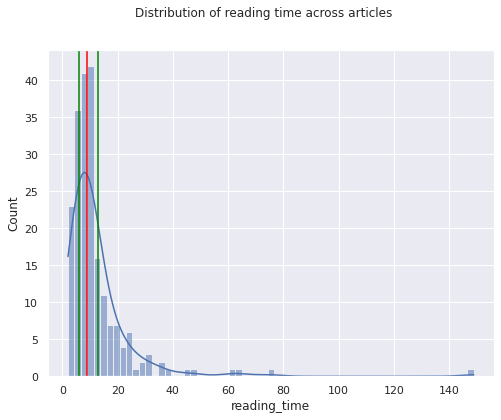

In [ ]:
# ditsribution of reading times in our corpus
fig, axes = plt.subplots(figsize = (8, 6))
# creating histograms
sns.histplot(articles["reading_time"], kde=True, ax = axes)
# Computing percentile of the reading_time data.
first_q = np.percentile(articles["reading_time"], 25)
# Computing median (50th percentile) of the reading_time data.
second_q = np.percentile(articles["reading_time"], 50)
third_q = np.percentile(articles["reading_time"], 75)
# green lines for 25th and 75th percentile
plt.axvline(first_q, color = "green")
# red line for median reading_time
plt.axvline(second_q, color = "red")
plt.axvline(third_q, color = "green")
# plot title
plt.suptitle("Distribution of reading time across articles")
plt.show()

* The graph is clearly right skewed.
* Hence most of ariticles in our corpus have a less reading time, with some articles having reading in hours.
* The median reading time is 9 minutes.

### **How does the reading time relates with article length ?**

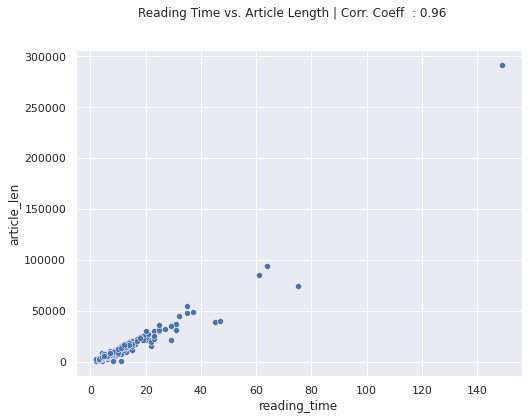

In [ ]:
from scipy.stats import pearsonr

articles["article_len"] = articles["text"].apply(lambda x : len(x))
# creating scatterplot
fig, axes = plt.subplots(figsize = (8, 6))
sns.scatterplot(x = articles["reading_time"], y = articles["article_len"])
# Pearson correlation coefficient measures the linear relationship between two set of values.
corr_coeff, _ = pearsonr(articles["reading_time"], articles["article_len"])
# plot title
plt.suptitle("Reading Time vs. Article Length | Corr. Coeff  : {}".format(round(corr_coeff, 2)))
plt.show()

- As expected, the reading time and article length are correlated.

#### **Do writers usually write articles on similar topics ?**

Let's have a look at the authors now. Authors usually have a preference to write on the same topic.

In [ ]:
for author, count in dict(articles["author"].value_counts()).items():
    if(count < 2):
        continue
    print("Articles by {} :".format(author))
    for title in articles[articles["author"] == author]["title"].values:
        print(title)
    print("-"*120)

Articles by Adam Geitgey :
Machine Learning is Fun Part 5: Language Translation with Deep Learning and the Magic of Sequences
Machine Learning is Fun! Part 4: Modern Face Recognition with Deep Learning
Machine Learning is Fun! Part 3: Deep Learning and Convolutional Neural Networks
Machine Learning is Fun! Part 2
Machine Learning is Fun Part 6: How to do Speech Recognition with Deep Learning
------------------------------------------------------------------------------------------------------------------------
Articles by Joseph Rocca :
Ensemble methods: bagging, boosting and stacking
Understanding Variational Autoencoders (VAEs)
Understanding Generative Adversarial Networks (GANs)
------------------------------------------------------------------------------------------------------------------------
Articles by Natassha Selvaraj :
I tripled my income with data science. Here's how.
How to Land a Data Analytics Job in 6 Months
Top 10 Data Science Projects for Beginners
-----------------

- In the data that we have, it does seem that authors tend to write multiple articles on the same topic.

- But also, there are multiple authors writing on the same topic,

- **For example:**
> 1. Adam Geitgey & Susan Li, both seems to write on Machine Learning.
> 2. Natassha Selvaraj, Sara A. Metwalli & Terence Shin, all seems to write on buidling career as a Data Scientist.

---
##Solving common preprocessing Problems in NLP.
---

### Expanding Word Contractions

* Contractions are the shortened word of english words or phrases.
> Example -
> $$can't \rightarrow can\hspace{0.1cm} not$$
> $$you're \rightarrow you\hspace{0.1cm} are$$
> $$you'll've \rightarrow you\hspace{0.1cm} will\hspace{0.1cm} have$$

* Why is this a problem?
> Because of the following reasons -
> 1. They add in a special apostrophe character (computers cannot understand its meaning) to the text.
> 2. They are a combination of two words, hence can cause problems in tokenization.

* How to deal with it ?
> 1. Create a custom mapping of expansions.
> 2. Using contractions library.

In [ ]:
import re
# creating custom mapping
custom_mapping = {
    "n't" : " not",
    "'re" : " are",
    "'ve" : " have",
    "'ll" : " will",
    "'m" : " am"
}
# sample data
sample_text = """
I've decided to go to the party after all. I'll reach by 05:00 PM.
He's not coming with us.
It's his birthday and he has other plans.
They've thought about going to the movies.
I won't be going to movies.
"""
expanded_text = sample_text
for x in custom_mapping.keys():
    expanded_text = re.sub(x, custom_mapping[x], expanded_text)

print(expanded_text)


I have decided to go to the party after all. I will reach by 05:00 PM.
He's not coming with us.
It's his birthday and he has other plans.
They have thought about going to the movies.
I wo not be going to movies.



* **The problem with above approach**

> 1. The number of contractions can be large to list all.
> 2. There can be some not so simple cases which breaks the rule, like "won't".

> Lets try out second approach.

**Using contractions library:**
[Contractions Github](https://github.com/kootenpv/contractions)

In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110 kB 4.9 MB/s 
     |████████████████████████████████| 287 kB 42.5 MB/s 


In [ ]:
import contractions

expanded_text = contractions.fix(sample_text)
print(expanded_text)


I have decided to go to the party after all. I will reach by 05:00 PM.
He is not coming with us.
It is his birthday and he has other plans.
They have thought about going to the movies.
I will not be going to movies.



#### Observe how efficient this library is.

---
## How do we represent text as numbers ?
---

* Machine learning algorithms need input data as numbers.
* What we have here is textual data.
* So we need to find a way to convert these texts into numbers (or vectors).
* Imagine each document that we have, is represented as a vector of numbers, of size $N$.




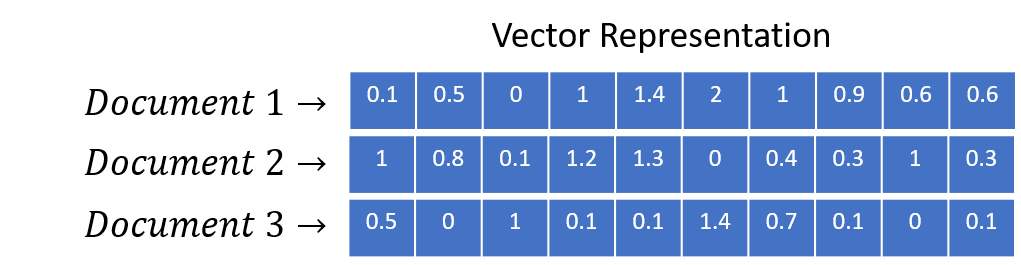

- Now once we have vectorized, each document we can use them as features for any machine learning model of our choice.

- There are multiple ways using which we can get a vector representation of text. Let's have a look at a couple of them.

# What could be the simplest techniques of converting a document into a vector?

### One-Hot encoding:

* Assigns 0 to all elements in a vector except for one, which has a value of 1. `This value represents a category of an element`.
```
For example:
If sentence = “Lecture on text representation"
```

### Step 1 - Create a vocabulary from the above corpus

> Vocabulary is simply a set of all unique words in the documents. For the above example, the vocabulary would be
* Lecture
* on
* text
* representation

### Step 2 - Each word in the sentence would be represented as below:

**Word** | Lecture | on | text | representation |
:--- | :---: | :---: | :---: | :---: |
**Lecture** | 1 | 0 | 0 | 0 |
**on** | 0 | 1 | 0 | 0 |
**text** | 0 | 0 | 1 | 0 |
**representation** | 0 | 0 | 0 | 1 |


```
Lecture → [1 0 0 0], on → [0 1 0 0], text → [0 0 1 0], representation → [0 0 0 1]
```
### Step 3 - The entire sentence is then represented as:
```
sentence = [ [1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1] ]
```

* Intuition behind it is that each bit represents a possible category.
* And if a particular variable cannot fall into multiple categories, then a single bit is enough to represent it.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import itertools
# two example documents
docs = ["cat","dog","bat","ate","lion","dog","bat"]
# split documents to tokens
tokens_docs = [doc.split(" ") for doc in docs]
# convert list of of token-lists to one flat list of tokens
# and then create a dictionary that maps word to id of word,
all_tokens = itertools.chain.from_iterable(tokens_docs)
word_to_id = {token: idx for idx, token in enumerate(set(all_tokens))}
# convert token lists to token-id lists
token_ids = [[word_to_id[token] for token in tokens_doc] for tokens_doc in tokens_docs]
# convert list of token-id lists to one-hot representation
vec = OneHotEncoder(categories="auto")
X = vec.fit_transform(token_ids)
print(X.toarray())

[[0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]


<details>
<summary>
    <font size="4" color=""><b>Drawbacks:</b></font>
</summary>
<p>
<ol>
    <li><b>Cannot measure the importance of a word</b> in a sentence. Only understands the mere presence/absence of a word in a sentence.</li>
    <li><b>High dimensional sparse matrix representation</b> can be memory & computationally expensive.</li>
    <li><b>Explosion in feature space</b> if the number of categories is very high.</li>
    <li>The vector representation of words is orthogonal and <b>cannot determine or measure the relationship between different words.</b></li>
    
</ol>
</p>

---
## Let's optimize the OHE representation
---

## Optimizing One Hot Encoding using Sparse vectors

* Only storing indicies of each word, to save space

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import itertools
# two example documents
docs = ["cat","dog","bat","ate","lion","dog","bat"]
# split documents to tokens
tokens_docs = [doc.split(" ") for doc in docs]
# convert list of of token-lists to one flat list of tokens
# and then create a dictionary that maps word to id of word,
all_tokens = itertools.chain.from_iterable(tokens_docs)
word_to_id = {token: idx for idx, token in enumerate(set(all_tokens))}
# convert token lists to token-id lists
token_ids = [[word_to_id[token] for token in tokens_doc] for tokens_doc in tokens_docs]
token_ids


[[4], [2], [3], [0], [1], [2], [3]]

## How can we further optimize on One Hot Encoding ?
## Can we use the frequency of each word in the document ?

* **Bag Of Words**: Puts `words in a “bag” & computes the frequency of occurrence of each word`.


```
Let's start with an example. Let us assume that our corpus contains following 3 texts -
1. It was the best of times
2. It was the worst of times
3. It was the age of wisdom and the age of foolishness
```

### How do we do it?
### Step 1 - Create a vocabulary from the above corpus

Vocabulary is simply a set of all unique words in the documents. For the above example, the vocabulary would be -
* it
* was
* the
* best
* of
* times
* worst
* age
* wisdom
* and
* foolishness

### Step 2 - Construct One Hot Encoded representation of the words

For every sentence in a text, create a OHE representation of it using the vocabulary from Step 1.

For the 1st sentence -

**Word** | it | was | the | best | of | times |
:--- | :---: | :---: | :---: | :---: | :---: | :---: |
**it** | 1 | 0 | 0 | 0 | 0 | 0 |
**was** | 0 | 1 | 0 | 0 | 0 | 0 |
**the** | 0 | 0 | 1 | 0 | 0 | 0 |
**best** | 0 | 0 | 0 | 1 | 0 | 0 |
**of** | 0 | 0 | 0 | 0 | 1 | 0 |
**times** | 0 | 0 | 0 | 0 | 0 | 1 |  
**worst** | 0 | 0 | 0 | 0 | 0 | 0 |
**age** | 0 | 0 | 0 | 0 | 0 | 0 |
**wisdom** | 0 | 0 | 0 | 0 | 0 | 0 |
**and** | 0 | 0 | 0 | 0 | 0 | 0 |
**foolishness** | 0 | 0 | 0 | 0 | 0 | 0 |

Similarly, for the 2nd sentence -

**Word** | it | was | the | worst | of | times |
:--- | :---: | :---: | :---: | :---: | :---: | :---: |
**it** | 1 | 0 | 0 | 0 | 0 | 0 |
**was** | 0 | 1 | 0 | 0 | 0 | 0 |
**the** | 0 | 0 | 1 | 0 | 0 | 0 |
**best** | 0 | 0 | 0 | 0 | 0 | 0 |
**of** | 0 | 0 | 0 | 0 | 1 | 0 |
**times** | 0 | 0 | 0 | 0 | 0 | 1 |  
**worst** | 0 | 0 | 0 | 1 | 0 | 0 |
**age** | 0 | 0 | 0 | 0 | 0 | 0 |
**wisdom** | 0 | 0 | 0 | 0 | 0 | 0 |
**and** | 0 | 0 | 0 | 0 | 0 | 0 |
**foolishness** | 0 | 0 | 0 | 0 | 0 | 0 |

### Step 3 - Combine the OHE word representations for every document

Once we have the OHE of all words in a document, the only thing left is to combine them, to get a get a single vector representation for the document. The are two common ways to do so -
1. Using a binary OR operator between the OHE vectors. The final document vector that we get in this case simply tells the absence or presence of certain words in the document.
2. Using a vector sum opeartor. The final document vector that we get in this case tells the frequency of each word in the document.

Lets apply both the combination techniques in the 3rd sentence -

**Word** | it | was | the | age | of | wisdom | and | the | age | of | foolishness |    | Combining using OR | Combining using SUM
:--- | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
**it** | 1 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | | **1** | **1** |
**was** | 0 | 1 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | | **1** | **1** |  
**the** | 0 | 0 | 1 | 0 | 0 | 0 | 0 | 1 | 0 | 0 | 0 | | **1** | **2** |  
**best** | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | | **0** | **0** |  
**of** | 0 | 0 | 0 | 0 | 1 | 0 | 0 | 0 | 0 | 1 | 0 | | **1** | **2** |
**times** | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | | **0** | **0** |   
**worst** | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | | **0** | **0** |  
**age** | 0 | 0 | 0 | 1 | 0 | 0 | 0 | 0 | 1 | 0 | 0 | | **1** | **2** |  
**wisdom** | 0 | 0 | 0 | 0 | 0 | 1 | 0 | 0 | 0 | 0 | 0 | | **1** | **1** |  
**and** | 0 | 0 | 0 | 0 | 0 | 0 | 1 | 0 | 0 | 0 | 0 | | **1** | **1** |
**foolishness** | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 1 | | **1** | **1** |

**Note: The combination using the sum operator is more commonly used, as it conveys more information about the text - like which words are used more frequently (this is obviously done after removing stopwords).**

The representation of all the 3 texts above are -

**Sentence** | it | was | the | best | of | times | worst | age | wisdom | and | foolishness
:--- | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---:
**It was the best of times** | 1 | 1 | 1 | 1 | 1 | 1 | 0 | 0 | 0 | 0 | 0
**It was the worst of times** | 1 | 1 | 1 | 0 | 1 | 1 | 1 | 0 | 0 | 0 | 0
**It was the age of wisdom and the age of foolishness** | 1 | 1 | 2 | 0 | 2 | 0 | 0 | 2 | 1 | 1 | 1

* Here, we see that each of 3 documents are represented as a vector of size 11 (vocabulary size).

* This vectorization technique is easy to implement as well. Plus it also has a implementation in the scikit-learn package.

### The above representation is called Bag-of-Words (BOW)


**BOW is one of the simplest techniques use for textual feature extraction. Here, yet again we break the document into its smallest component - words, and build it from there.**

* It does not take into account the word order or lexical information for text representation.

* The intuition is that documents having similar words are similar irrespective of the word positioning.



In [ ]:
# Custom implementation of BoW

# sample data
corpus = [
    "it was the best of times",
    "it was the worst of times",
    "it was the age of wisdom and the age of foolishness"
]

def get_bow_representation(corpus, frequency = True):
    vocabulary = set([x for x in " ".join(corpus).lower().split(" ")])

    bow_rep = []
    for sentence in corpus:
        sentence_rep = dict([(v,0) for v in vocabulary])
        for word in word_tokenize(sentence.lower()):
            if frequency:
                sentence_rep[word] += 1
            else:
                sentence_rep[word] = 1
        bow_rep.append(sentence_rep)
    return bow_rep

bow_representation = get_bow_representation(corpus, True)
df = pd.DataFrame(bow_representation)
df.index = corpus
display(df)

,worst,and,age,best,it,was,of,times,wisdom,foolishness,the
it was the best of times,0,0,0,1,1,1,1,1,0,0,1
it was the worst of times,1,0,0,0,1,1,1,1,0,0,1
it was the age of wisdom and the age of foolishness,0,1,2,0,1,1,2,0,1,1,2


## Using [Sklearn CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

* It `converts` the corpus of multiple sentences (say product reviews) into a `matrix of reviews & words` & fills it with the frequency of each word in a sentence.

In [ ]:
# Using CountVectorizer from scikit-learn
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
# Learn the vocabulary dictionary and return document-term matrix
bow_rep = cv.fit_transform(corpus).todense()  # todense() returns a matrix
# create dataframe
df = pd.DataFrame(bow_rep)
# Get output feature names for dataframe columns.
df.columns = cv.get_feature_names()
df.index = corpus
display(df)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,age,and,best,foolishness,it,of,the,times,was,wisdom,worst
it was the best of times,0,0,1,0,1,1,1,1,1,0,0
it was the worst of times,0,0,0,0,1,1,1,1,1,0,1
it was the age of wisdom and the age of foolishness,2,1,0,1,1,2,2,0,1,1,0


* CountVectorizer has a lot of inbuilt text processing features.

* One of them is removing stop words directly from the corpus.

In [ ]:
# using CountVectorizer for removing stop-words directly from the corpus.
cv = CountVectorizer(stop_words="english")
bow_rep = cv.fit_transform(corpus).todense()
df = pd.DataFrame(bow_rep)
df.columns = cv.get_feature_names()
df.index = corpus
display(df)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,age,best,foolishness,times,wisdom,worst
it was the best of times,0,1,0,1,0,0
it was the worst of times,0,0,0,1,0,1
it was the age of wisdom and the age of foolishness,2,0,1,0,1,0


### Problems:
1. The BOW representation considers each word to be equally important (in the final document vector, each word in the text has an equal contribution of 1 at one of the positions).

2. It can not distinguish between the rare important words and the common words.

- **For example:**
> If you're looking at a set of articles about deep learning, then the phrase "neural network" might be present in a lot of articles and hence does not convey a lot of information (considering the corpus).

But the phrase "Reinforcement Learning" might be present in a few, and hence does convey unique information about those specific articles.

<details>
<summary>
    <font size="4" color=""><b>Can you think of any drawbacks of BOW representation?</b></font>
</summary>
<p>
<ol>
    <li>This method ignores the location information of the word. It is not possible to grasp the meaning of a word from this representation.</li>
    <li>The intuition that high-frequency words are more important or give more information about the sentence fails when it comes to stop-words like “is, the, an, I” & when the corpus is context-specific.</li>
    <li>For example, in a corpus about covid-19, the word coronavirus may not add a lot of value.</li>
    
</ol>
</p>
</details>








### **So, is there a way we can create word vectors with rare and important words getting more weightage ?**

**Advanced BOW**

* To suppress the very high-frequency words & ignore the low-frequency words, there is a need to normalize the “weights” of the words accordingly.

## [What is TF-IDF?](https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089)
TF-IDF is another very popular technique to get the feature representation for a text in a corpus. Similar to the BOW model, here as well the size of final document vector is equal to the number of tokens considered.

As the name suggests, TF-IDF is mainly composed of two components - TF (Term Frequency) and IDF (Inverse Document Frequency).

<!-- <img src="images/tfidf.PNG" width="800" height="800"> -->

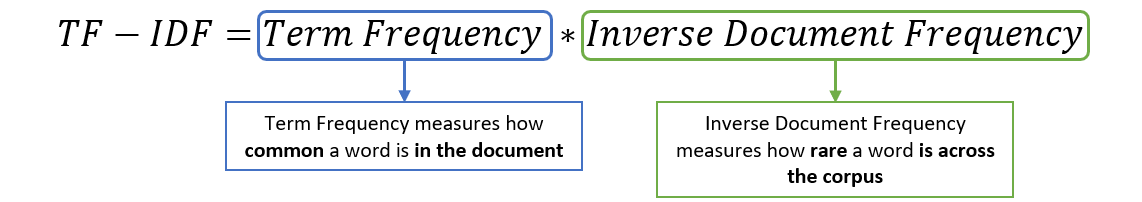

#### What is Term Frequency (TF) in TF-IDF?

- Term Frequency is the measure of how common a word (or token) is in the document.
- More `common words` (or tokens) `of a document` would have a `higher term frequency`.This is calculated for every word in a document.

- There are various ways to determine the term frequency. One of the most common formulation of TF is -
$$TF(t,d) = \frac{f_{t,d}}{\sum_{t' \in d} f_{t',d}} $$

Here,
* $TF(t,d)$ is the term Frequency of term $t$ in document $d$
* $f_{t,d}$ is the frequency of term $t$ in document $d$

The above formulation is simply the ratio of the frequency of a term in the document to the total number of terms in the document. TF of the term increases as the frequency of the term increases.

Some other formulations for Term Frequency are -
1. Using the raw count itself, $TF(t,d) = f_{t,d}$
2. Using boolean frequency, $TF(t,d) = 1$ if $t$ occurs in $d$ else $0$
3. Logarithmically scaled frquencies, $TF(t,d) = log(1 + f_{t,d})$
4. Augmented frequency to prevent bias towards longer documents, $$TF(t,d) = 0.5 + 0.5 * \frac{f_{t,d}}{max(f_{t', d} : t' \in d)} $$

Using the same example from before, lets computer the TF for each word in the corpus -
1. It was the best of times
2. It was the worst of times
3. It was the age of wisdom and the age of foolishness

In [ ]:
# sample data
corpus = [
    "it was the best of times",
    "it was the worst of times",
    "it was the age of wisdom and the age of foolishness"
]

def get_term_frequency(corpus):
    vocabulary = set([x for x in " ".join(corpus).lower().split(" ")])

    term_freq = []
    for sentence in corpus:
        sentence_tf = dict([(v,0) for v in vocabulary])
        for word in word_tokenize(sentence.lower()):
            sentence_tf[word] += 1
        for v in vocabulary:
            sentence_tf[v] /= len(word_tokenize(sentence))
        term_freq.append(sentence_tf)
    return term_freq

term_freq = get_term_frequency(corpus)
df = pd.DataFrame(term_freq)
df.index = corpus
display(df)

,worst,and,age,best,it,was,of,times,wisdom,foolishness,the
it was the best of times,0.000000,0.000000,0.000000,0.166667,0.166667,0.166667,0.166667,0.166667,0.000000,0.000000,0.166667
it was the worst of times,0.166667,0.000000,0.000000,0.000000,0.166667,0.166667,0.166667,0.166667,0.000000,0.000000,0.166667
it was the age of wisdom and the age of foolishness,0.000000,0.090909,0.181818,0.000000,0.090909,0.090909,0.181818,0.000000,0.090909,0.090909,0.181818


#### Inverse Document Frequency (IDF)

- Inverse Document Frequency measures `how rare a word (or token) is across corpus`.
- A `rarer word` (or token) would have a `larger IDF`. There are multiple ways to determine IDF as well.

- One of the most common formulation is -
$$IDF(t,C) = log(\frac{|d|}{|{d \in C : t \in d}|})$$

Here,
* $IDF(t,d,C)$ is the Inverse Document Frequency of term $t$ in corpus $C$. As we can see from the formulation, IDF is calculated for each word at corpus level and not for individual documents.
* $|d|$ is the absolute number of documents in the corpus.
* $|{d \in C : t \in d}|$ is the number of documents in corpus $C$ which contains the term $t$

The above formulation is simply the log scaled inverse fraction of documents which contains the term $t$ in the corpus $D$.

Log is used as it dampens the effect of huge number of documents in the corpus.

Some other formulations of Inverse Document Frequency are -
1. Smoothened IDF, $$IDF(t,C) = log(\frac{|d|}{1 + |{d \in C : t \in d}|}) + 1$$
2. Max IDF, $$IDF(t,C) = log(\frac{max_{t' \in d}(|{d \in C : t' \in d}|)}{|{d \in C : t \in d}|})$$

In [ ]:
def get_inverse_document_frequency(corpus):
    vocabulary = set([x for x in " ".join(corpus).lower().split(" ")])
    n = len(corpus)

    inverse_document_frequency = {}
    for v in vocabulary:
        num_docs = 0
        for sentence in corpus:
            if v in word_tokenize(sentence.lower()):
                num_docs += 1
        inverse_document_frequency[v] = np.log(n/num_docs)
    return inverse_document_frequency

inverse_document_frequency = get_inverse_document_frequency(corpus)
inverse_document_frequency

{'worst': 1.0986122886681098,
 'and': 1.0986122886681098,
 'age': 1.0986122886681098,
 'best': 1.0986122886681098,
 'it': 0.0,
 'was': 0.0,
 'of': 0.0,
 'times': 0.4054651081081644,
 'wisdom': 1.0986122886681098,
 'foolishness': 1.0986122886681098,
 'the': 0.0}

In [ ]:
def get_tf_idf(corpus):
    tf = get_term_frequency(corpus)
    idf = get_inverse_document_frequency(corpus)

    tf_idf = []
    for tf_dict in tf:
        tf_idf_sentence = {}
        for t, term_freq in tf_dict.items():
            tf_idf_sentence[t] = term_freq * idf[t]
        tf_idf.append(tf_idf_sentence)

    return tf_idf

tf_idf = get_tf_idf(corpus)
df = pd.DataFrame(tf_idf)
df.index = corpus
display(df)

,worst,and,age,best,it,was,of,times,wisdom,foolishness,the
it was the best of times,0.000000,0.000000,0.000000,0.183102,0.0,0.0,0.0,0.067578,0.000000,0.000000,0.0
it was the worst of times,0.183102,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.067578,0.000000,0.000000,0.0
it was the age of wisdom and the age of foolishness,0.000000,0.099874,0.199748,0.000000,0.0,0.0,0.0,0.000000,0.099874,0.099874,0.0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# using inbuilt TfidfVectorizer() function to calculate TF-IDF
tf_idf_vectorizer = TfidfVectorizer()
tf_idf_rep = tf_idf_vectorizer.fit_transform(corpus).todense()
df = pd.DataFrame(tf_idf_rep)
df.columns = tf_idf_vectorizer.get_feature_names()
df.index = corpus
display(df)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,age,and,best,foolishness,it,of,the,times,was,wisdom,worst
it was the best of times,0.000000,0.000000,0.579897,0.000000,0.342496,0.342496,0.342496,0.441027,0.342496,0.000000,0.000000
it was the worst of times,0.000000,0.000000,0.000000,0.000000,0.342496,0.342496,0.342496,0.441027,0.342496,0.000000,0.579897
it was the age of wisdom and the age of foolishness,0.617558,0.308779,0.000000,0.308779,0.182370,0.364740,0.364740,0.000000,0.182370,0.308779,0.000000


* The results from custom implementation and from scikit-learn of TFIDF are `different` as TFIDF of scikit-learn uses `smoothening for IDF, normalization and other improvements`.

* Similar to CountVectorizer, TfidfVectorizer also has many `inbuilt text processing functionalities`, like `removing stopwords`, setting `ngarm range` etc.  

---
## TF-IDF vs BOW
---
#### Let's understand them better with a common example

In [ ]:
# sample data
corpus = [
    "it was the best of times",
    "it was the worst of times",
    "it was the age of wisdom and the age of foolishness"
]

# BOW
bow_representation = get_bow_representation(corpus, True)

# Tf-IDF
tf_idf_representation = get_tf_idf(corpus)


# Group their labels
grouped_representation = []
for i in range(3):
    bow_sentence = bow_representation[i]
    tf_idf_sentence = tf_idf_representation[i]
    grouped_sentence = {}
    for word in bow_sentence.keys():
        # Rounding decimals to 3 significant digits
        grouped_sentence[word] = (round(bow_sentence[word], 3), round(tf_idf_sentence[word], 3))

    grouped_representation.append(grouped_sentence)

df = pd.DataFrame(grouped_representation)
df.index = corpus
display(df)

,worst,and,age,best,it,was,of,times,wisdom,foolishness,the
it was the best of times,"(0, 0.0)","(0, 0.0)","(0, 0.0)","(1, 0.183)","(1, 0.0)","(1, 0.0)","(1, 0.0)","(1, 0.068)","(0, 0.0)","(0, 0.0)","(1, 0.0)"
it was the worst of times,"(1, 0.183)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(1, 0.0)","(1, 0.0)","(1, 0.0)","(1, 0.068)","(0, 0.0)","(0, 0.0)","(1, 0.0)"
it was the age of wisdom and the age of foolishness,"(0, 0.0)","(1, 0.1)","(2, 0.2)","(0, 0.0)","(1, 0.0)","(1, 0.0)","(2, 0.0)","(0, 0.0)","(1, 0.1)","(1, 0.1)","(2, 0.0)"


## We see that...

#### TF-IDF

* It computes the feature importances of a word in a document of a corpus
* It can detect and nullify the effect of stopwords on feature vector of a sentence

#### Bag Of Words
* It computes the frequencies (or) presence of a word in a document of a corpus
* It assigns equal priority to every word. It cannot detect stopwords


### Ngram parameter ( we will study ngram later on)
* `ngram` and how it can be used. For example, the word "`neural networks`" tend to come in pair. So we should tokenize such words together as a single token "`neural_networks`".

* `TfidfVectorizer` has inbuild parameters to achieve this:

In [ ]:
# Bigram using TfidfVectorizer
tf_idf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
tf_idf_rep = tf_idf_vectorizer.fit_transform(corpus).todense()
df = pd.DataFrame(tf_idf_rep)
df.columns = tf_idf_vectorizer.get_feature_names()
df.index = corpus
display(df)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,age,age of,and,and the,best,best of,foolishness,it,it was,of,of foolishness,of times,of wisdom,the,the age,the best,the worst,times,was,was the,wisdom,wisdom and,worst,worst of
it was the best of times,0.000000,0.000000,0.000000,0.000000,0.400008,0.400008,0.000000,0.236251,0.236251,0.236251,0.000000,0.304216,0.000000,0.236251,0.000000,0.400008,0.000000,0.304216,0.236251,0.236251,0.000000,0.000000,0.000000,0.000000
it was the worst of times,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.236251,0.236251,0.236251,0.000000,0.304216,0.000000,0.236251,0.000000,0.000000,0.400008,0.304216,0.236251,0.236251,0.000000,0.000000,0.400008,0.400008
it was the age of wisdom and the age of foolishness,0.415353,0.415353,0.207677,0.207677,0.000000,0.000000,0.207677,0.122657,0.122657,0.245314,0.207677,0.000000,0.207677,0.245314,0.415353,0.000000,0.000000,0.000000,0.122657,0.122657,0.207677,0.207677,0.000000,0.000000




<details>
<summary>
    <font size="4" color=""><b>Important parameters:</b></font>
</summary>
<p>
<ul>
    <li><b>text preprocessing parameters</b>: lowercase, strip_accent, stop_words, etc</li>
    <li><b>norm</b>: to apply l1 & l2 norm</li>
    <li><b>ngram_range</b>: range of n-values for different n-grams to be extracted</li>
    <li><b>sublinear_tf</b>: Apply sublinear tf scaling, i.e. replace tf with 1 + log(tf)</li>
</ul>
</p>
</details>

<details>
<summary>
    <font size="4" color=""><b>Summary of TF-IDF:</b></font>
</summary>
<p>
<ol>
    <li>Builds over CountVectorizer to <b> penalize highly frequent words & low-frequency terms in a corpus.</b></li>
    <li>IDF aims to <b>reduce noise</b> in our matrix.</li>
    <li>TF-IDF can be used to filter out uncommon & irrelevant words easily helping model train & converge faster.</li>
</ol>
</p>
</details>

<details>
<summary>
    <font size="4" color=""><b>Drawbacks of TF-IDF representation:</b></font>
</summary>
<p>
<ol>
    <li><b>Positional information</b> of the word is still <b>not captured</b> in this representation.</li>
    <li>TF-IDF is highly <b>corpus-dependent</b>.</li>
    <li>A matrix representation generated out of cricket data cannot be used for football or volleyball. Therefore, there is a <b>need to have high-quality training data</b>.</li>
    
</ol>
</p>


Some of the drawbacks of both BOW and TFIDF method are -
1. For a large corpus, the vocabulary can be huge, hence computation and storage of both BOW and TFIDF can be difficult.
2. Both BOW and TFIDF only considers the presence or absence of words. None of them considers the meaning.

> For example, consider the words 'good', 'nice' and 'bad' in vocabulary. All three of them would be equally different from each other according to the BOW representation, however we know that 'good' and 'nice' are similar in meaning and are both different from the word 'bad'.


<details>
<summary>
    <font size="4" color=""><b>Problems with above representations:</b></font>
</summary>
<p>
<ul>
    <li>It <b>does not leverage co-occurrence statistics between words</b>. It assumes all words are independent of each other</li>
    <li>This leads to highly sparse vectors with few non zero values</li>
    <li>They <b>do not capture the context or semantics</b> of the word.</li>
    <li> It does not consider spooky & scary as similar but as two independent terms with no commonality between them.</li>
    <li>The representation is directly proportional to vocabulary size. <b>High vocabulary size can lead to memory constraints</b>.</li>
</ul>
</p>
</details>

## Back to our task at hand...
---
### Euclidean Distance vs Cosine Similarity
---

#### How do we calculate the distance between the words (or how do we measure the difference between the two words) ?

- Each of the word above is representend as a vector of numbers.
- So, if we could find `distance between the representations`, it would technically `give the distance between the corresponsing words` (using the current vectorization technique).

So the next question is

> **How do we calculate the distance between two vectors ?**

- We can imagine each of vectors above as a point in $N$ (here 3) dimensional space.

- There are 2 popular distance metrics that we usually use to calculate the distance between any 2 points in space -

### 1. Euclidean Distance

This is the well known method to calculate the distance bewteen any 2 points in space. It is like `mesauring distance using ruler`.

$$euclidean \hspace{0.1cm} distance = \sqrt{\sum_{i}^{N}(X_i - Y_i)^2 }$$

Here,
* $X$ and $Y$ are the 2 vectors.
* Size of each vector is $N$


### 2. Cosine Distance

- Before we look at cosine distance, let us look at cosine similarity, because that is what we usually see being used at most places.
- Cosine similarity measures the similarity between two vectors, and is `mathematically represented as the cosine of angle between the 2 vectors`.
- As the definition suggests, cosine similarity only depends on the angle between the vectors and not the magnitude between the vectors.

$$cosine \hspace{0.1cm} similarity = cos(\theta) =  \frac{\sum_{i}^{N}X_i.Y_i}{\sqrt{\sum_{i}^{N}(X_i)^2 } \sqrt{\sum_{i}^{N}(Y_i)^2 }}$$

Here,
* $X$ and $Y$ are the 2 vectors.
* $\theta$ is the angle between $X$ and $Y$.

As per above formulation, $cosine \hspace{0.1cm} similarity$ can range from $-1$ to $1$. Two vectors which lie on the same line ($\theta = 0$) have a cosine similarity of $1$ and two vectors which lie in opposite direction to each other ($\theta = 180$) have a cosine similarity of -1.

###Cosine distance is calculated as  -

$$cosine \hspace{0.1cm} distance = 1 - cosine \hspace{0.1cm} similarity$$

- **Cosine distance can range from 0 to 2.**

[euclidean-distance-vs-cosine-similarity](https://www.baeldung.com/cs/euclidean-distance-vs-cosine-similarity)

`Vectors with a small Euclidean distance from one another are located in the same region of a vector space. Vectors with a high cosine similarity are located in the same general direction from the origin`.

### Cosine vs. Euclidean - which one to use ?

- Cosine Similarity is typically used in the cases when the magnitude of the vector does not matter.

* **For example:**

> In the cases of textual representation using something like BOW, a word like "cricket" might be present 50 times in one document which has 1000 words, and 5 times in another document with 100 words. It we calculate the distance using euclidean metric, we might not find the two documents very similar. But this is because of the difference in the length between the 2 documents. Cosine similarity accounts for this very well as this does not look at the magnitude but the angle between the documents (represented by vectors). And here, even though the difference in magnitude is high, the angle will be small.


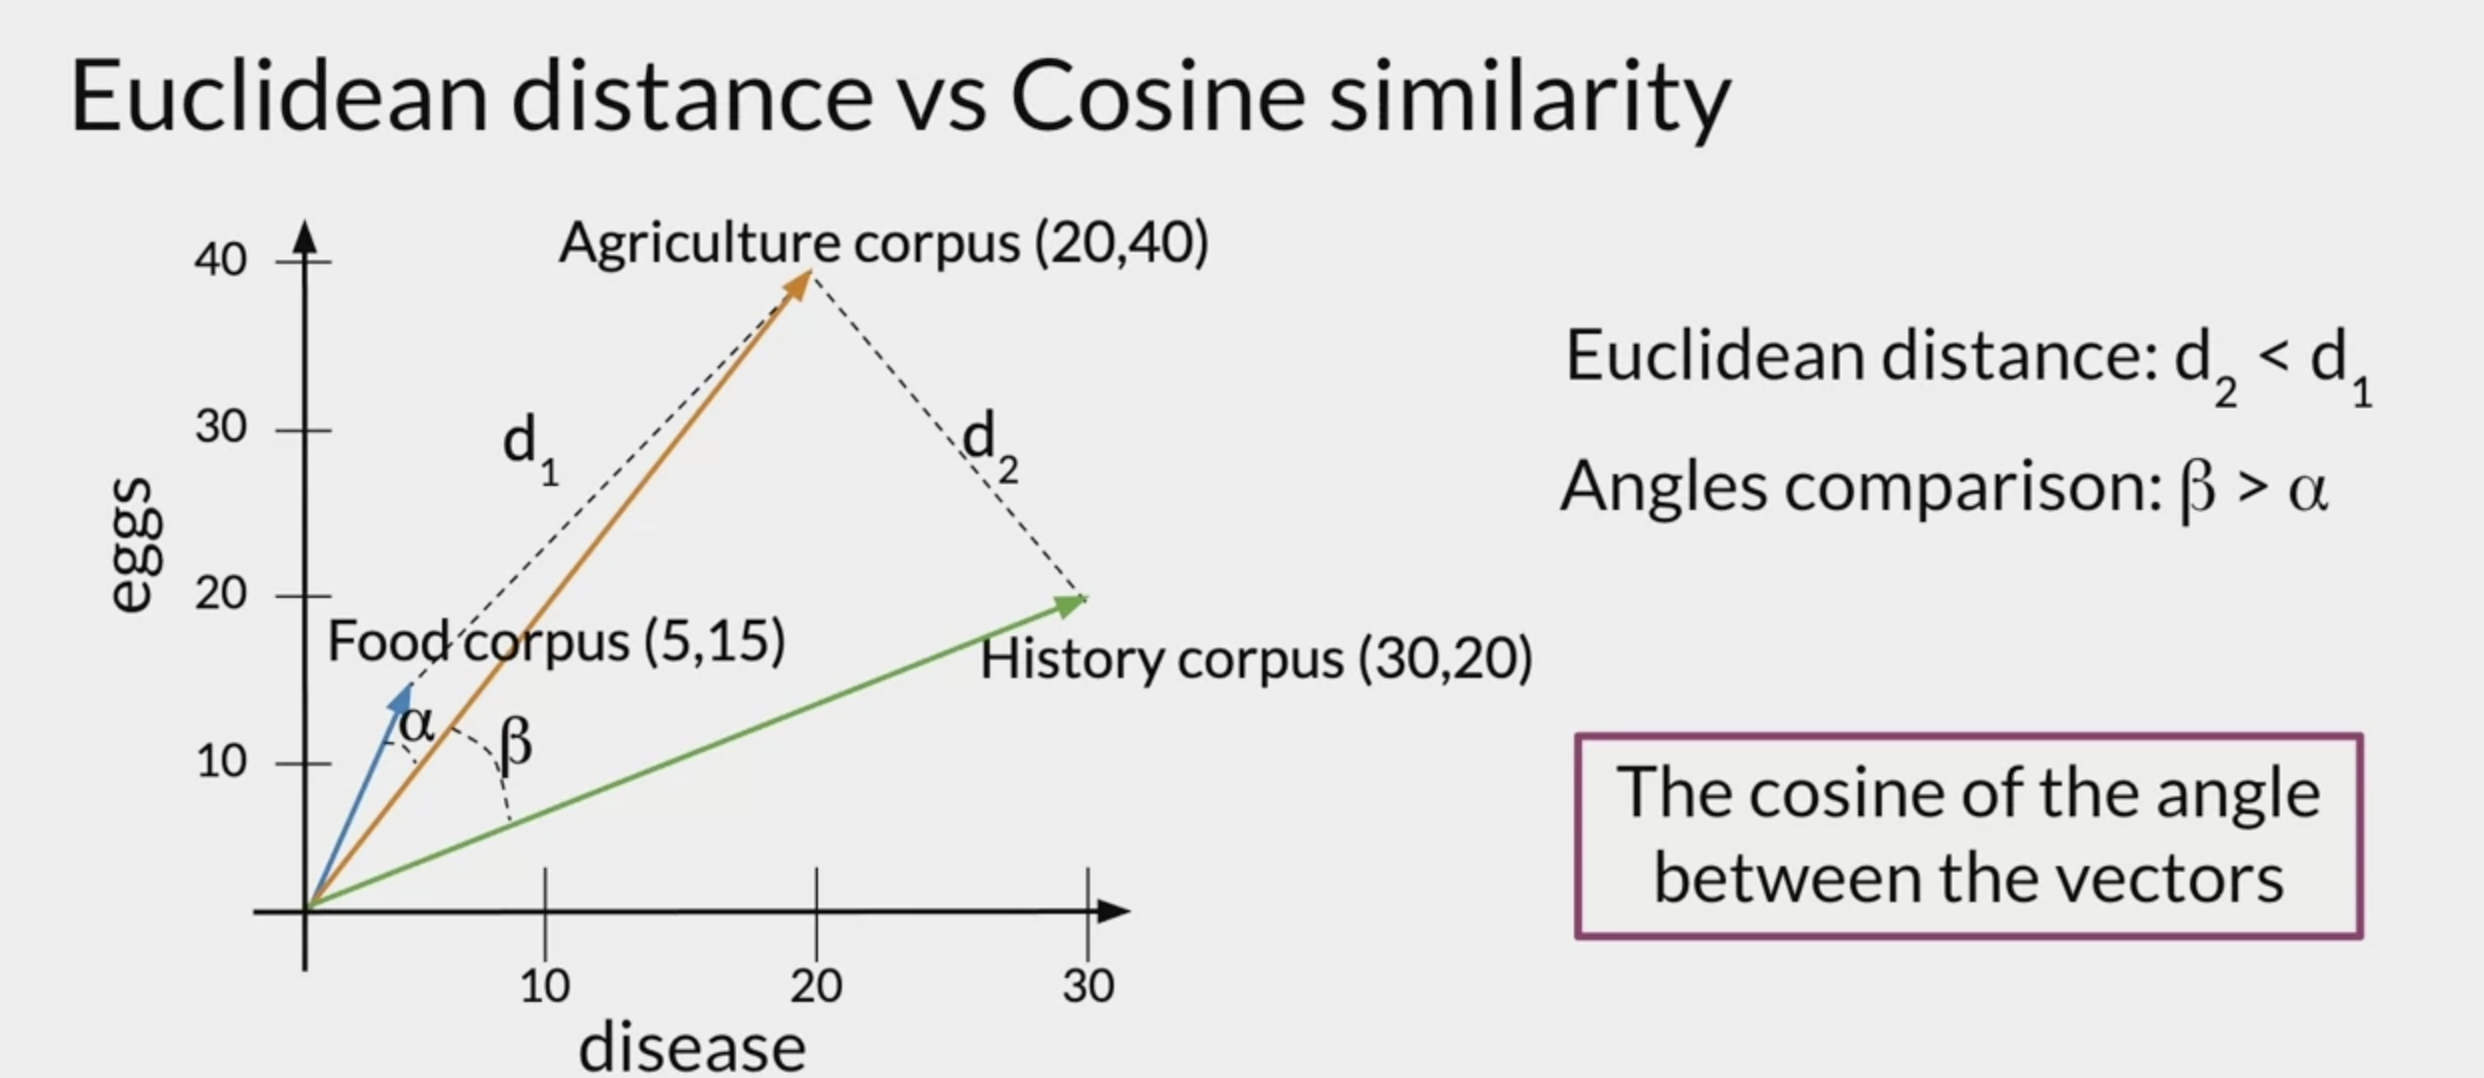




###Coming back to the original problem -
* Given the 3 words (king, man and water), all represented using BOW vectors, lets try and find the distance between them using cosine distance metric.

In [ ]:
# 3 words represented by BOW vectors
king = [1, 0, 0]
man = [0, 1, 0]
water = [0, 0, 1]
# calculate cosine distance
def cosine_distance(x, y):
    return 1 - np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

print("Cosine Distance")
print("Between {} and {} : {}".format("king", "man", cosine_distance(king, man)))
print("Between {} and {} : {}".format("king", "water", cosine_distance(king, water)))
print("Between {} and {} : {}".format("water", "man", cosine_distance(man, water)))

Cosine Distance
Between king and man : 1.0
Between king and water : 1.0
Between water and man : 1.0


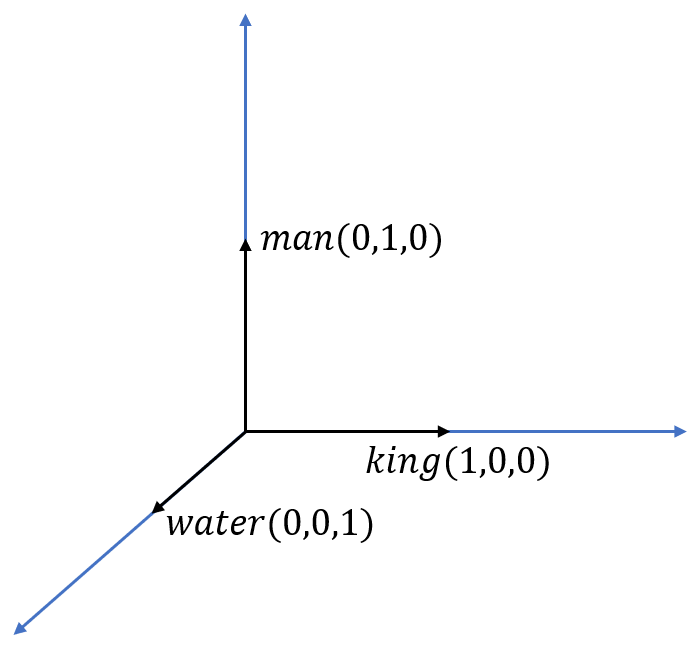

<!-- <img src="images/bow_ex_graph.PNG" width="400" height="400"> -->

- The above image shows that the 3 vectors lie perpendicular to each other.
- Hence cosine similarity b/w any 2 of them is 0 (hence is distance between any 2 of them is 1)

### - From our knowledge of engligh language we do know that a "king" and "man" are more similar to each other as compared to "king" and "water" (or "water" and "man").







* **Example 1:**
> Suppose you have two questions:
> 1. "Where are you heading?"
> 2. "Where are you from?".

* **Note: that these sentences have identical words, except for the last ones. However, they both have a different meaning.**

> **Example 2:**
> Suppose you have two questions:
> 1. "What is your age?"
> 2. "How old are you?".

* **Note: words are completely different but both sentences mean the same.**

* **So this shows that BOW based vectorization technique do not capture the meaning of the words.**


### Preprocessing:

We would first need to process the data that we have using the techniques we discussed earlier in the lecture -

1. Split the article into sentences.
2. For each sentence in the corpus -
    1. Convert the sentence to lowercase
    2. Expand contractions
    3. Lemmatization
    4. Remove stopwords
    5. Remove punctuations

In [ ]:
def process_sentence(sentence, nlp_object):
    # Convert to lowercase
    sentence = sentence.lower()

    # Exapnding contractions
    sentence = contractions.fix(sentence)

    # Lemmatization and removing stopwords
    doc = nlp_object(sentence)
    sentence = " ".join([token.lemma_ for token in doc if not token.is_stop])

    # Remove punctuation
    for p in string.punctuation:
        sentence = sentence.replace(p, " ")
    sentence = re.sub(r"\s+", " ", sentence) # Replace all whitespace characters with space

    return sentence

In [ ]:
from tqdm.notebook import tqdm
# tqdm to see real time progress
tqdm.pandas()

nlp = spacy.load('en_core_web_sm') # English pipeline optimized for CPU

def process_article(article_text, nlp_object):
    processed_article_sentences = []
    # using nltk sentence tokenizer
    for sentence in sent_tokenize(article_text):
        # preprocessing each sentence using our process_sentence function
        processed_article_sentences.append(process_sentence(sentence, nlp_object))
    # joining preprocessed sentence as a complete paragrams of the article
    return " ".join(processed_article_sentences)

articles["processed_text"] = articles["text"].progress_apply(lambda x : process_article(x, nlp))


  0%|          | 0/208 [00:00<?, ?it/s]

At this point we have processed and tokenized the article text. Now finally let us try to find out the similarity between the articles.

---
## How will we find similarity between documents ?
---
**Document Similarity**

Well, we would first need to make a vector representation of the documents. We have already seen a couple of ways to do that -
1. BOW
2. TF-IDF

And the similarity metric would again be cosine similarity.

### Similarity using BOW

In [ ]:
# BOW representation of the dataset Using CountVectorizer from scikit-learn
count_vectorizer = CountVectorizer(min_df=5)
# min_df: ignore terms that have a document frequency strictly lower than the given threshold.

# Learn the vocabulary dictionary and return document-term matrix
bow_features = count_vectorizer.fit_transform(articles["processed_text"]).todense() # todense() returns a matrix
# create dataframe
bow_features_df = pd.DataFrame(bow_features)
bow_features_df.columns = count_vectorizer.get_feature_names() # Get output feature names for dataframe columns.
bow_features_df["TITLE"] = articles["title"]
bow_features_df["ID"] = articles["id"]
display(bow_features_df)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,01,05,06,07,10,100,1000,101,10k,10x,11,12,120,125,128,13,14,15,150,16,17,18,19,1980,1989,1990,1k,1st,20,200,2000,2001,2005,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,21,...,wire,wise,wish,withdraw,woman,wonder,wonderful,wood,word,work,worker,workflow,working,workout,world,worried,worry,worsen,worth,wow,wrap,write,writer,writing,wrong,www,xgboost,xi,yeah,year,yearly,yell,yellow,yes,yesterday,yield,yo,york,you,young,youtube,zero,zhou,zip,zombie,zone,zoom,zuckerberg,TITLE,ID
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Ensemble methods: bagging, boosting and stacking",1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Understanding AUC - ROC Curve,2
2,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,How to work with object detection datasets in ...,3
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4,0,0,0,0,3,0,1,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,11 Dimensionality reduction techniques you sho...,4
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,The Time Series Transformer,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,1,0,0,3,0,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Type 2 Diabetes Reversal The Quick Start Guide,210
204,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,2,0,0,How a 22 Day Water Fast Changed My Life,211
205,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Breaking Your Fast,212
206,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10,0,0,0,0,1,0,0,0,0,0,0,3,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,11 Unusual Tips for How to Wake Up Early,213


---
## How will we visualize this high dimensional data?
---

### [T-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)
- T-distributed Stochastic Neighbor Embedding is a method of visualizing high dimensional data
- It converts similarities to joint probabilities and minimizes the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data

In [ ]:
from sklearn.manifold import TSNE
# using t-sne to observe any trends, and clusters.
tsne = TSNE(n_components=2) # n_components: estimated number of components
tsne_bow_features = tsne.fit_transform(bow_features_df[count_vectorizer.get_feature_names_out()].values)
tsne_bow_features_df = pd.DataFrame(tsne_bow_features)
tsne_bow_features_df.columns = ["C1", "C2"]
tsne_bow_features_df["TITLE"] = bow_features_df["TITLE"]
tsne_bow_features_df["ID"] = bow_features_df["ID"]

display(tsne_bow_features_df)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


,C1,C2,TITLE,ID
0,-3.766976,3.832330,"Ensemble methods: bagging, boosting and stacking",1
1,-1.512818,-0.284274,Understanding AUC - ROC Curve,2
2,-2.527956,3.053830,How to work with object detection datasets in ...,3
3,-3.019499,2.399323,11 Dimensionality reduction techniques you sho...,4
4,-3.008904,1.024227,The Time Series Transformer,5
...,...,...,...,...
203,3.720150,-0.592128,Type 2 Diabetes Reversal The Quick Start Guide,210
204,4.460946,-2.413854,How a 22 Day Water Fast Changed My Life,211
205,4.534660,-2.270833,Breaking Your Fast,212
206,2.534135,-2.776935,11 Unusual Tips for How to Wake Up Early,213


In [ ]:
import plotly.express as px
# scatter plot of t-sne for the BOW representation

title = "T-distributed Stochastic Neighbor Embedding for BOW document representation"

fig = px.scatter(tsne_bow_features_df, x="C1", y="C2", hover_data=['TITLE'], title=title)
fig.show()

### What do we notice in the above graph ?

- We see most of documents to the right half describe articles related to Deep learning.
- Articles plotted to the left describe Coronavirus, Economics and other miscellaneous articles

Now, let us see if we can find similar documents using BOW reresentation.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def get_similar_documents(all_article_rep_df, article_id, features):
    # extracting features of a article
    this_article_rep = all_article_rep_df[all_article_rep_df["ID"] == article_id][features]
    other_article_rep = all_article_rep_df[all_article_rep_df["ID"] != article_id][features]
    # calculating cosine similarity
    similarity_matrix = cosine_similarity(this_article_rep, other_article_rep)
    similar_articles = list(zip(similarity_matrix[0].tolist(), all_article_rep_df["TITLE"].tolist()))
    # sorting
    similar_articles = sorted(similar_articles, key = lambda x : x[0], reverse = True)
    print("Reference Article : {}".format(all_article_rep_df[all_article_rep_df["ID"] == article_id]["TITLE"].values[0]))

    print("**** Similar Articles ****")
    # top 5 similar articles
    for score, title in similar_articles[:5]:
        print(title)
    print()

# Let us check top 5 similar articles for some of the articles in our corpus
get_similar_documents(bow_features_df, 90, count_vectorizer.get_feature_names_out())
get_similar_documents(bow_features_df, 80, count_vectorizer.get_feature_names_out())
get_similar_documents(bow_features_df, 150, count_vectorizer.get_feature_names_out())
get_similar_documents(bow_features_df, 205, count_vectorizer.get_feature_names_out())

Reference Article : 17 types of similarity and dissimilarity measures used in data science.
**** Similar Articles ****
9 Distance Measures in Data Science
17 Clustering Algorithms Used In Data Science and Mining
Machine Learning Basics with the K-Nearest Neighbors Algorithm
OVER 100 Data Scientist Interview Questions and Answers!
Fundamental Techniques of Feature Engineering for Machine Learning

Reference Article : TensorFlow Tutorial Part 1
**** Similar Articles ****
How to go from a Python newbie to a Google Certified TensorFlow Developer under two months
Enchanted Random Forest
PCA using Python (scikit-learn)
The 7 Best Data Science and Machine Learning Podcasts
Building RNN, LSTM, and GRU for time series using PyTorch

Reference Article : The One Word That Explains Why Economics Professors Are Not Billionaires
**** Similar Articles ****
Why People Still Don't Get Cryptocurrency
You May Have A Poor Person's Mindset And Not Know It
You Will Never Be Rich If You Keep Doing These 10 t

**Result:**
- The suggested articles do seem to be similar to those in reference.
- BOW looks for presence and absence of words in different documents, so documents which have similar words would also have similar BOW representation, and hence would be more similar.

### Similarity using TF-IDF

In [ ]:
# TF-IDF representation of the dataset Using TfidfVectorizer from scikit-learn
tfidf_vectorizer = TfidfVectorizer(min_df=5)
# min_df: ignore terms that have a document frequency strictly lower than the given threshold.
tfidf_features = tfidf_vectorizer.fit_transform(articles["processed_text"]).todense()  # todense() returns a matrix
# create dataframe
tfidf_features_df = pd.DataFrame(tfidf_features)
tfidf_features_df.columns = tfidf_vectorizer.get_feature_names()  # Get output feature names for dataframe columns.
tfidf_features_df["TITLE"] = articles["title"]
tfidf_features_df["ID"] = articles["id"]
display(tfidf_features_df)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,00,000,01,05,06,07,10,100,1000,101,10k,10x,11,12,120,125,128,13,14,15,150,16,17,18,19,1980,1989,1990,1k,1st,20,200,2000,2001,2005,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,21,...,wire,wise,wish,withdraw,woman,wonder,wonderful,wood,word,work,worker,workflow,working,workout,world,worried,worry,worsen,worth,wow,wrap,write,writer,writing,wrong,www,xgboost,xi,yeah,year,yearly,yell,yellow,yes,yesterday,yield,yo,york,you,young,youtube,zero,zhou,zip,zombie,zone,zoom,zuckerberg,TITLE,ID
0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.007980,0.005187,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.013338,0.0,0.0,0.000000,0.000000,0.009177,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,"Ensemble methods: bagging, boosting and stacking",1
1,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.013973,0.0,0.0,0.000000,0.025727,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,Understanding AUC - ROC Curve,2
2,0.000000,0.0,0.0,0.0,0.01922,0.0,0.008293,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.014672,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.023045,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.014814,0.0,0.0,0.010827,0.013638,0.000000,0.0,0.0,0.006663,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,How to work with object detection datasets in ...,3
3,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.006747,0.000000,0.0,0.0,0.0,0.0,0.008682,0.006805,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.013454,0.0,0.0,0.0,0.0,0.013790,0.0,0.008247,0.000000,0.0,0.0,0.0,0.017298,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.006579,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.006371,0.0,0.0,0.000000,0.000000,0.0,0.0,11 Dimensionality reduction techniques you sho...,4
4,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033916,0.000000,0.039066,0.0,0.000000,0.0,...,0.0,0.0,0.033916,0.0,0.000000,0.000000,0.0,0.0,0.021280,0.027664,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,The Time Series Transformer,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2

In [ ]:
tsne = TSNE(n_components=2)
tsne_tfidf_features = tsne.fit_transform(tfidf_features_df[tfidf_vectorizer.get_feature_names_out()].values)
tsne_tfidf_features_df = pd.DataFrame(tsne_tfidf_features)
tsne_tfidf_features_df.columns = ["C1", "C2"]
tsne_tfidf_features_df["TITLE"] = tfidf_features_df["TITLE"]
display(tsne_tfidf_features_df)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



,C1,C2,TITLE
0,6.254388,10.419925,"Ensemble methods: bagging, boosting and stacking"
1,4.634700,18.682501,Understanding AUC - ROC Curve
2,-0.896234,13.886839,How to work with object detection datasets in ...
3,3.089645,14.519775,11 Dimensionality reduction techniques you sho...
4,11.353494,0.254676,The Time Series Transformer
...,...,...,...
203,3.638199,-19.150652,Type 2 Diabetes Reversal The Quick Start Guide
204,0.551373,-18.073492,How a 22 Day Water Fast Changed My Life
205,1.270169,-18.803946,Breaking Your Fast
206,-1.988436,-12.611320,11 Unusual Tips for How to Wake Up Early


In [ ]:
title = "T-distributed Stochastic Neighbor Embedding for TFIDF document representation"
fig = px.scatter(tsne_tfidf_features_df, x="C1", y="C2", hover_data=['TITLE'], title=title)
fig.show()

- In the above scatter plot, we see points usually allong three different directions.
- Hovering over the points, it seems the three directions contains articles broadly on the following topics -
> 1. Data Science/Machine Learning
> 2. Health
> 3. Finance

In [ ]:
# Let us check top 5 similar articles for some of the articles in our corpus
get_similar_documents(tfidf_features_df, 90, tfidf_vectorizer.get_feature_names_out())
get_similar_documents(tfidf_features_df, 80, tfidf_vectorizer.get_feature_names_out())
get_similar_documents(tfidf_features_df, 150, tfidf_vectorizer.get_feature_names_out())
get_similar_documents(tfidf_features_df, 205, tfidf_vectorizer.get_feature_names_out())

Reference Article : 17 types of similarity and dissimilarity measures used in data science.
**** Similar Articles ****
9 Distance Measures in Data Science
17 Clustering Algorithms Used In Data Science and Mining
Machine Learning Basics with the K-Nearest Neighbors Algorithm
OVER 100 Data Scientist Interview Questions and Answers!
Fundamental Techniques of Feature Engineering for Machine Learning

Reference Article : TensorFlow Tutorial Part 1
**** Similar Articles ****
How to go from a Python newbie to a Google Certified TensorFlow Developer under two months
Enchanted Random Forest
Building RNN, LSTM, and GRU for time series using PyTorch
Yes you should understand backprop
PCA using Python (scikit-learn)

Reference Article : The One Word That Explains Why Economics Professors Are Not Billionaires
**** Similar Articles ****
You Will Never Be Rich If You Keep Doing These 10 things
Why People Still Don't Get Cryptocurrency
You May Have A Poor Person's Mindset And Not Know It
How I transfo

TFIDF also seems to work well. Notice one improvement in the articles sugested for "The One Word That Explains Why Economics Professors Are Not Billionaires"
- All 5 articles suggested using TFIDF seems more relevant as conpared to articles suggested by BOW.

- Also notice the improvement in recommendations suggested for "TensorFlow Tutorial Part 1"

## Concluding Remarks

#### How do we evaluate performance in unsupervised learning problems ?
Validations from - surveys, user feedbacks etc.


#### How the topics we talked about forms the building blocks of NLP ?
The topics we discussed in this lecture forms the basic building blocks in Natural Language Processing.
- Here we saw that the Medium articles in our corpus mainly belonged to Data Science, Health and Finance.
- In other words there are three (or maybe more) broad topics, that our corpus talks about - this can be seggregated or identified using Topic Modeling.
- The vectorization techniques that we talked about are used extensively in text classification problems as well.
- Further there are more advanced vectorization techniques - which use language models and other deep learning methods - and these are the ones that are State of The Art in most of NLP problems.



---
## Extra material
---

### TF-IDF using smoothened IDF

In [ ]:
def get_smoothened_inverse_document_frequency(corpus):
    vocabulary = set([x for x in " ".join(corpus).lower().split(" ")])
    n = len(corpus)

    inverse_document_frequency = {}
    for v in vocabulary:
        num_docs = 0
        for sentence in corpus:
            if v in word_tokenize(sentence.lower()):
                num_docs += 1
        inverse_document_frequency[v] = 1 + np.log(n/(1+num_docs))
    return inverse_document_frequency

# TF-IDF using Max-IDF

In [ ]:
def get_max_inverse_document_frequency(corpus):
    vocabulary = set([x for x in " ".join(corpus).lower().split(" ")])
    n = len(corpus)

    inverse_document_frequency = {}

    # Maximum number of documents with a common term
    max_vocab_num_docs = 0
    for v in vocabulary:
        num_docs = 0
        for sentence in corpus:
            if v in word_tokenize(sentence.lower()):
                num_docs += 1

        max_vocab_num_docs = max(max_vocab_num_docs, num_docs)

        # Calculate denominator of Max-IDF
        inverse_document_frequency[v] = -np.log(num_docs)

    # Calculate numerator of Max-IDF
    for key in inverse_document_frequency.keys():
        inverse_document_frequency[key] += np.log(max_vocab_num_docs)

    return inverse_document_frequency

In [ ]:
def get_tf_idf(corpus, idf_type="normal"):
    tf = get_term_frequency(corpus)
    if(idf_type == "normal"):
        idf = get_inverse_document_frequency(corpus)
    elif(idf_type == "smoothened"):
        idf = get_smoothened_inverse_document_frequency(corpus)
    else: # Assuming IDF type is max-idf
        idf = get_max_inverse_document_frequency(corpus)

    tf_idf = []
    for tf_dict in tf:
        tf_idf_sentence = {}
        for t, term_freq in tf_dict.items():
            tf_idf_sentence[t] = term_freq * idf[t]
        tf_idf.append(tf_idf_sentence)

    return tf_idf

for idf_type in ["normal", "smoothened", "max"]:
    tf_idf = get_tf_idf(corpus, idf_type)
    df = pd.DataFrame(tf_idf)
    df.index = corpus
    display(df)

,worst,and,age,best,it,was,of,times,wisdom,foolishness,the
it was the best of times,0.000000,0.000000,0.000000,0.183102,0.0,0.0,0.0,0.067578,0.000000,0.000000,0.0
it was the worst of times,0.183102,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.067578,0.000000,0.000000,0.0
it was the age of wisdom and the age of foolishness,0.000000,0.099874,0.199748,0.000000,0.0,0.0,0.0,0.000000,0.099874,0.099874,0.0


,worst,and,age,best,it,was,of,times,wisdom,foolishness,the
it was the best of times,0.000000,0.00000,0.000000,0.234244,0.118720,0.118720,0.118720,0.166667,0.00000,0.00000,0.118720
it was the worst of times,0.234244,0.00000,0.000000,0.000000,0.118720,0.118720,0.118720,0.166667,0.00000,0.00000,0.118720
it was the age of wisdom and the age of foolishness,0.000000,0.12777,0.255539,0.000000,0.064756,0.064756,0.129512,0.000000,0.12777,0.12777,0.129512


,worst,and,age,best,it,was,of,times,wisdom,foolishness,the
it was the best of times,0.000000,0.000000,0.000000,0.183102,0.0,0.0,0.0,0.067578,0.000000,0.000000,0.0
it was the worst of times,0.183102,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.067578,0.000000,0.000000,0.0
it was the age of wisdom and the age of foolishness,0.000000,0.099874,0.199748,0.000000,0.0,0.0,0.0,0.000000,0.099874,0.099874,0.0
